# Airline Analysis

With the use of a curated set of data, the purpose of this project allows us to imagine that we work for a travel agency and need to know the ins and outs of airline prices for specific clients. We want to make sure that we can find the best deal for the client and help them to understand how airline prices change based on different factors.

Contained in the file "flight.csv," The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.info())
print(flight.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB
None
   miles  passengers  delay inflight_meal inflight_entertainment 

### Using univariate graphical analysis we can answer the following questions

What do coach ticket prices look like \
What are the high and low values \
What would be considered the average \
Does $500 seem like a good price for a coach ticket

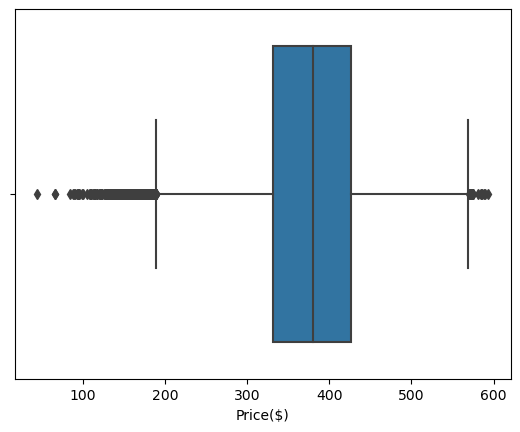

The boxplot above shows us our measure of central tendency in the mean, just below 400 dollars. The plot shows us what our interquartile range is, between between roughly 325 and 425 dollars. The plot also shows us a number of datapoints outside the IQR, trending toward the lower side of the graph


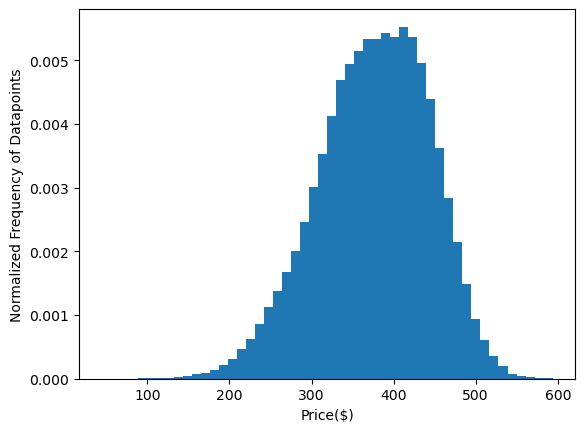

Using a histogram we can better analyze the distribution of coach flight prices across the full range of prices allowing us to better vizualize where all these datapoints land and in what volume


<Figure size 640x480 with 0 Axes>

In [10]:
sns.boxplot(x ="coach_price", data =flight)
plt.xlabel("Price($)")
plt.show()
plt.clf()
print("The boxplot above shows us our measure of central tendency in the mean, just below 400 dollars. The plot shows us what our interquartile range is, between between roughly 325 and 425 dollars. The plot also shows us a number of datapoints outside the IQR, trending toward the lower side of the graph")
plt.hist(flight.coach_price, bins = 50, density = True)
plt.xlabel("Price($)")
plt.ylabel("Normalized Frequency of Datapoints")
plt.show()
plt.clf()
print("Using a histogram we can better analyze the distribution of coach flight prices across the full range of prices allowing us to better vizualize where all these datapoints land and in what volume")


Visualizing the coach ticket prices for flights that are 8 hours long,\
What are the high, low, and average prices for 8-hour-long flights, \
Does a $500 dollar ticket seem more reasonable than before

The lowest price for an eight hour ticket is $170.77
The highest price for an eight hour ticket is $593.64
The average price for an eight hour ticket is $431.83


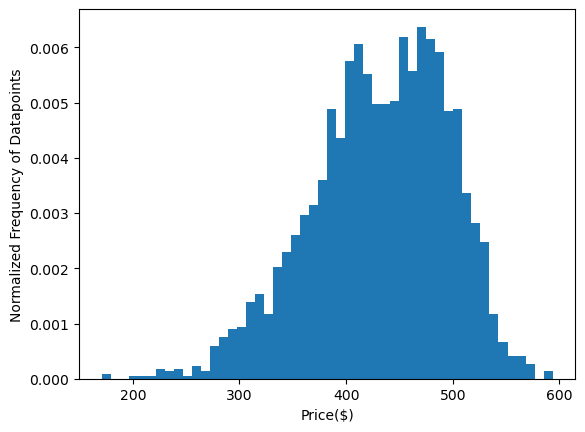

With the information provided from the last visualization, if the mean price for all tickets lands just below $400 according to the boxplot ($376.59 to be specific), the pricetag of $431.83 for the average 8 hour coach ticket lands relatively in the same ballpark just outside the total IQR of coach prices.


<Figure size 640x480 with 0 Axes>

In [4]:
eight_hour_price = flight[(flight.hours == 8)]

lowprice = np.round(eight_hour_price.coach_price.min(),2)
print("The lowest price for an eight hour ticket is ${}".format(lowprice))
maxprice = np.round(eight_hour_price.coach_price.max(),2)
print("The highest price for an eight hour ticket is ${}".format(maxprice))
averageprice = np.round(eight_hour_price.coach_price.mean(),2)
print("The average price for an eight hour ticket is ${}".format(averageprice))

plt.hist(flight.coach_price[(flight.hours == 8)], bins = 50, density= True)
plt.xlabel("Price($)")
plt.ylabel("Normalized Frequency of Datapoints")
plt.show()
plt.clf()

print("With the information provided from the last visualization, if the mean price for all tickets lands just below $400 according to the boxplot (${} to be specific), the pricetag of ${} for the average 8 hour coach ticket lands relatively in the same ballpark just outside the total IQR of coach prices.".format(np.round(flight.coach_price.mean(),2),averageprice))

How are flight delay times distributed\
If there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight, what kinds of delays are typical

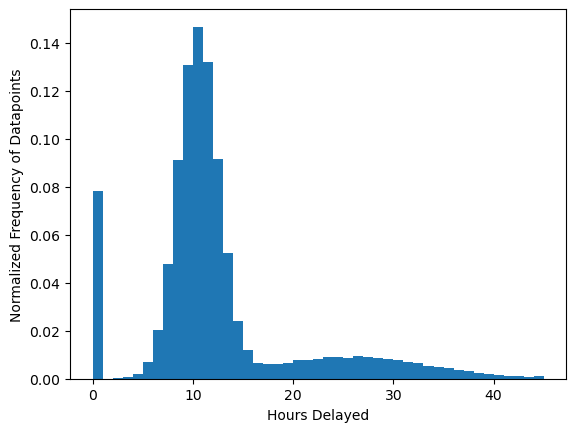

From the graph generated of all the flight delays plotted and normalized on a histogram, we can infer that the large portion of delays last somewhere between 5 and 15 hours, with the mean of the dataset coming out to 13.16 hours


<Figure size 640x480 with 0 Axes>

In [17]:
plt.hist(flight.delay,range = (0,45), bins = 45, density = True)
plt.xlabel("Hours Delayed")
plt.ylabel("Normalized Frequency of Datapoints")
plt.show()
plt.clf()
print("From the graph generated of all the flight delays plotted and normalized on a histogram, we can infer that the large portion of delays last somewhere between 5 and 15 hours, with the mean of the dataset coming out to {} hours".format(np.round(flight.delay.mean(),2)))

### Using bivariate analysis we can answer the following questions

Visualize the relationship between coach and first-class prices. \
Do flights with higher coach prices always have higher first-class prices

The correlation and covariance of the two variables comes out to 0.76 and 8357.38 respectively.
A positive relationship for both


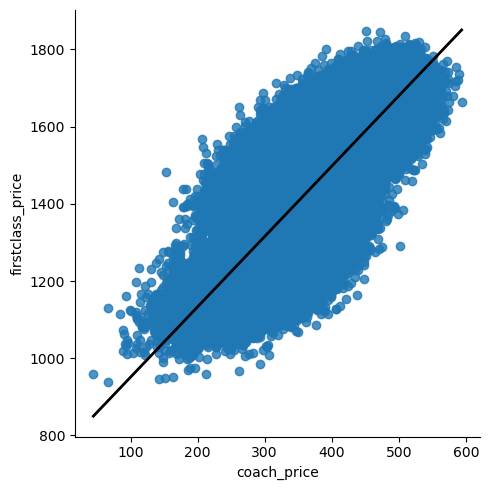

Using a scatterplot of the coach prices against the first class prices along with a few measurable statistics regarding correlation, we can say with some confidence that as the coach ticket prices rise, the first class ticekts will follow suit.


<Figure size 640x480 with 0 Axes>

In [19]:
price_covariance_mat = np.cov(flight.coach_price, flight.firstclass_price)
#print(np.round(price_covariance,2))
price_covariance = 8357.38
price_correlation_result= pearsonr(flight.coach_price, flight.firstclass_price)
#print(np.round(price_correlation, 2))
price_correlation = 0.76
print("The correlation and covariance of the two variables comes out to {} and {} respectively.\nA positive relationship for both". format(price_correlation, price_covariance))

sns.lmplot(x="coach_price", y="firstclass_price", line_kws={"lw":2, "color":"black"}, data= flight)
plt.show()
plt.clf()

print("Using a scatterplot of the coach prices against the first class prices along with a few measurable statistics regarding correlation, we can say with some confidence that as the coach ticket prices rise, the first class ticekts will follow suit.")

Vizualize the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi\
Which features are associated with the highest increase in price

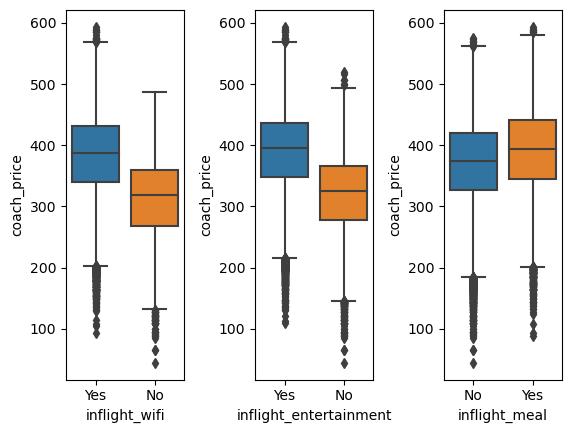

Using a few double box plots to compare measures of central tendency as they refer to having or lacking the specified features potentially offered with a coach ticket, what we can conclude is that inflight entertainment and inflight wifi generally are more disparately offered than an inflight meal on any given flight.


<Figure size 640x480 with 0 Axes>

In [21]:
plt.subplot(1,3,1)
sns.boxplot(data = flight, x='inflight_wifi', y='coach_price')

plt.subplot(1,3,2)
sns.boxplot(data = flight, x='inflight_entertainment', y='coach_price')

plt.subplot(1,3,3)
sns.boxplot(data= flight, x='inflight_meal', y='coach_price')

plt.subplots_adjust(wspace = .6)
plt.show()
plt.clf()

print("Using a few double box plots to compare measures of central tendency as they refer to having or lacking the specified features potentially offered with a coach ticket, what we can conclude is that inflight entertainment and inflight wifi generally are more disparately offered than an inflight meal on any given flight.")


How does the number of passengers change in relation to the length of flights

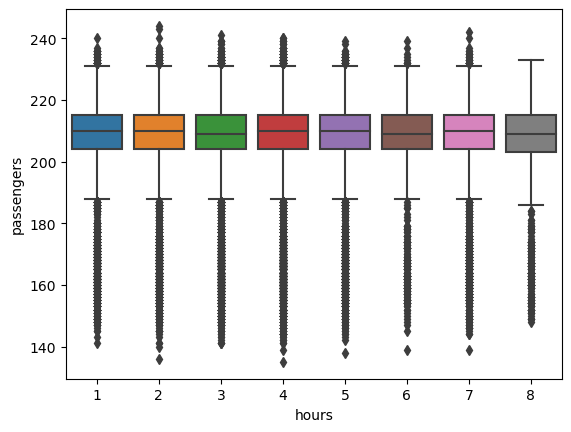

<Figure size 640x480 with 0 Axes>

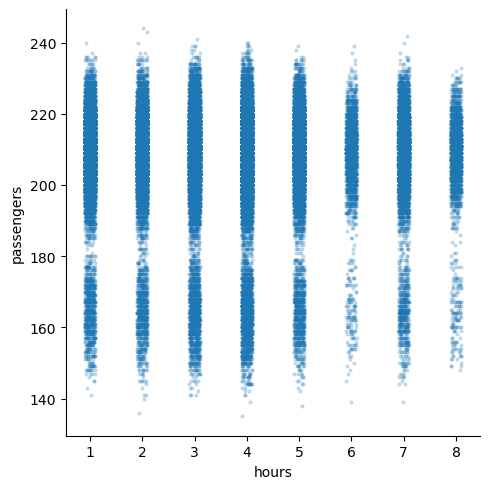

Using a two different visualizations to represent this data from the table, we can see that as the flights lengthen in time, the amount of passengers tends to be higher per flight, as shown more clearly in the scatterplot. 


<Figure size 640x480 with 0 Axes>

In [32]:
sns.boxplot(data = flight, x= "hours", y = 'passengers')
plt.show()
plt.clf()

sns.lmplot(x='hours',y='passengers', data = flight, x_jitter = .1, scatter_kws={"s": 4, "alpha":.2}, fit_reg = False )
plt.show()
plt.clf()

print("Using a two different visualizations to represent this data from the table, we can see that as the flights lengthen in time, the amount of passengers tends to be higher per flight, as shown more clearly in the scatterplot. ")


### Finally we can use multivariate analysis to answer the remaining questions about the data

Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

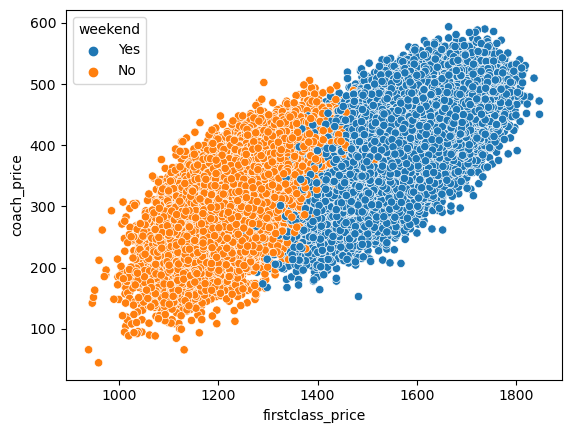

Adding the extra variable of the weekend to our initial scatterplot of coach versus first class prices, we are now shown that weekend flights are typically more expensive both for coahc and first class tickets


<Figure size 640x480 with 0 Axes>

In [34]:
sns.scatterplot(x="firstclass_price", y= "coach_price", hue= "weekend", data= flight)
plt.show()
plt.clf()

print("Adding the extra variable of the weekend to our initial scatterplot of coach versus first class prices, we are now shown that weekend flights are typically more expensive both for coahc and first class tickets")

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

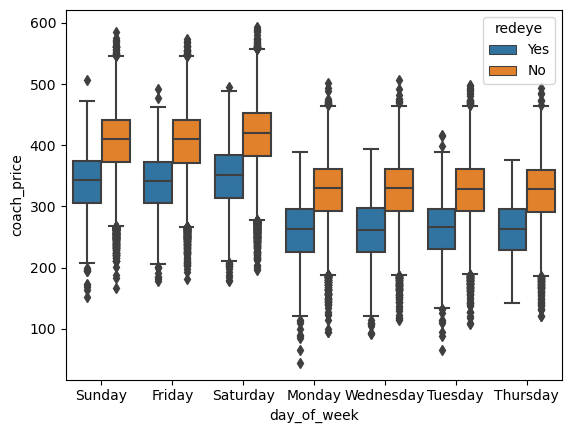

Using side by side boxplots we can see that across all days of the week, the price of a coach redeye ticket will most likely be cheaper then that of a flight during normal hours


<Figure size 640x480 with 0 Axes>

In [36]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()

print("Using side by side boxplots we can see that across all days of the week, the price of a coach redeye ticket will most likely be cheaper then that of a flight during normal hours")